### Import libs

In [1]:
!pip install catboost mlflow shap --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from catboost import CatBoostClassifier, CatBoostRegressor
from matplotlib import pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix

from tqdm import tqdm
import itertools

from pprint import pprint
from warnings import filterwarnings

import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, f1_score, roc_auc_score, mean_squared_error

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
#from sklearn.ensemble import VotingClassifier


from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool, CatBoostRegressor

import shap

shap.initjs()

import mlflow
mlflow.set_tracking_uri('http://79.137.194.156:5000/')
import time
import os

filterwarnings("ignore", category=FutureWarning)

### Download datasets

In [3]:
!gdown 1R5aGLhexvuh6TNf_UktYpvE_k6EKdIhy
!gdown 188t3TKx2Kv8vXCbYW4bfuwOTPRUypCjI
!gdown 1YC6Vit-4pYn9ynqqs1Sc18n4A3AWxzjW
!gdown 1EAOfE8I456dZ8XnZUiYdBqzAzpasxqrs
!gdown 1cyjujW-V4ogUWKCaihiRjb4aju5sE5hx
!gdown 1yIz7OtTaINrWEnj0jJgtIQC5CSZmL1u0
!gdown 1--YyJITs0MAymrjX_44aMCftEPUdndBh
!gdown 1-7HRkHw87D97WUP6xenuJWJ9RomBQTHb
!gdown 1-AvOyhBFPRTNkOa_aX2_ewZQx-j9nrJV

Downloading...
From: https://drive.google.com/uc?id=1R5aGLhexvuh6TNf_UktYpvE_k6EKdIhy
To: /content/train_user_order_aggs_v10.csv
100% 193M/193M [00:02<00:00, 70.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=188t3TKx2Kv8vXCbYW4bfuwOTPRUypCjI
To: /content/train_user_order_aggs_v5.csv
100% 67.4M/67.4M [00:01<00:00, 34.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YC6Vit-4pYn9ynqqs1Sc18n4A3AWxzjW
To: /content/train_user_order_aggs_v11.csv
100% 784M/784M [00:11<00:00, 65.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EAOfE8I456dZ8XnZUiYdBqzAzpasxqrs
To: /content/train_user_order_aggs_v12.csv
100% 337M/337M [00:04<00:00, 68.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cyjujW-V4ogUWKCaihiRjb4aju5sE5hx
To: /content/train_user_order_aggs_v13.csv
100% 350M/350M [00:02<00:00, 124MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yIz7OtTaINrWEnj0jJgtIQC5CSZmL1u0
To: /content/restorants_agg.csv
100% 681k/681k [00:00<00:00, 6.99MB/s]
Acc

### Regressor for RMSE

In [4]:
def read_train(dataset_name):
    df_train = pd.read_csv(f'train_{dataset_name}.csv', sep=',', compression='zip')

    df_train_0 = df_train[df_train['buy_post'] == 0]
    df_train_1 = df_train[df_train['buy_post'] == 1].sample(140905)
    df_train = pd.concat([df_train_0, df_train_1])
    target = df_train['date_diff_post']
    df_train['customer_id_binarize'] = pd.qcut(df_train['customer_id'], q=24, labels=False)
    df_train = df_train.drop(['date_diff_post'], axis=1)


    return df_train, target

### Define metrics and calculate it

In [67]:
model_metrics = []
from functools import partial

def get_metrics(y_true, y_pred):
    SC_RMSE = mean_squared_error(y_true, y_pred)

    ndf = [SC_RMSE]
    columns = ['RMSE']
    return dict(zip(columns, ndf))

def prepare_submit(trained_model, X_test):
  y_test = trained_model.predict(X_test)
  X_submit = pd.DataFrame(X_test['customer_id'])
  X_submit['date_diff_post'] = y_test
  return X_submit

### Run train script

In [9]:
from sklearn.utils.class_weight import compute_class_weight

datasets = 'user_order_aggs_v13'.split()


for i, dataset_name in enumerate(datasets):

    df_train, target = read_train(dataset_name)

    model_name = 'CatBoost_Regresor_Colab_Final'
    classes = np.unique(target)
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=target)

    folds = 2

    # Train-Test Separation
    X_train, X_val, y_train, y_val = train_test_split(df_train, target, test_size=(0.25), random_state=12345, stratify=target)

    # Add wieghted
    weights_train = []

    for i in y_train.values:
        if i == 1:
            weights_train.append(weights[1])
        else:
            weights_train.append(weights[0])

    weights_val = []

    for i in y_val.values:
        if i == 1:
            weights_val.append(weights[1])
        else:
            weights_val.append(weights[0])


    # Add Pool
    train_dataset = Pool(X_train,
                        y_train,
                        weight=weights_train)

    val_dataset = Pool(X_val,
                        y_val,
                        weight=weights_val)

    # Define model and run train cycle
    model = CatBoostRegressor(random_state=13, task_type='CPU')

    trained_model = CatBoostRegressor(random_state=13,
                                       learning_rate = 0.178,
                                       n_estimators=300,
                                       depth=6,
                                       l2_leaf_reg=7,
                                       task_type='CPU',
                                      loss_function='RMSE',
                                       thread_count = -1,
                                       ).fit(train_dataset)

    # Log metric to MLflow
    X = X_train
    with mlflow.start_run(run_name=f'grafML_{dataset_name}_{model_name}_Train'):
        y_pred = trained_model.predict(X)
        metrics_dict = get_metrics(y_train, y_pred)
        mlflow.log_metrics(metrics_dict)
        mlflow.log_param('catboost', str("learning_rate: 0.03, n_estimators=100, depth=6, l2_leaf_reg=7"))

    X = X_val
    with mlflow.start_run(run_name=f'grafML_{dataset_name}_{model_name}_Validation'):
        y_pred = trained_model.predict(X)
        metrics_dict = get_metrics(y_val, y_pred)
        mlflow.log_metrics(metrics_dict)
        mlflow.log_param('catboost', str("learning_rate: 0.03, n_estimators=100, depth=6, l2_leaf_reg=7"))



trained_model.save_model(f'grafML_user_order_aggs_v10_CatBoost_Colab_002_RMSE.cbm')

0:	learn: 22.2571036	total: 309ms	remaining: 1m 32s
1:	learn: 19.2065134	total: 600ms	remaining: 1m 29s
2:	learn: 16.8086479	total: 765ms	remaining: 1m 15s
3:	learn: 14.9508248	total: 920ms	remaining: 1m 8s
4:	learn: 13.5516835	total: 1.08s	remaining: 1m 3s
5:	learn: 12.5027346	total: 1.25s	remaining: 1m 1s
6:	learn: 11.7359280	total: 1.4s	remaining: 58.6s
7:	learn: 11.1932868	total: 1.55s	remaining: 56.7s
8:	learn: 10.7671495	total: 1.75s	remaining: 56.7s
9:	learn: 10.4734146	total: 1.93s	remaining: 56.1s
10:	learn: 10.2638706	total: 2.13s	remaining: 56s
11:	learn: 10.1050049	total: 2.29s	remaining: 54.9s
12:	learn: 9.9950937	total: 2.44s	remaining: 54s
13:	learn: 9.9152092	total: 2.62s	remaining: 53.5s
14:	learn: 9.8591850	total: 2.77s	remaining: 52.6s
15:	learn: 9.8202705	total: 2.93s	remaining: 52s
16:	learn: 9.7843835	total: 3.14s	remaining: 52.2s
17:	learn: 9.7553347	total: 3.29s	remaining: 51.5s
18:	learn: 9.7183128	total: 3.47s	remaining: 51.3s
19:	learn: 9.7028956	total: 3.62s

### Feature importance and SHAP

In [10]:
f_i = trained_model.get_feature_importance()
f_n = X_train.columns.to_list()
sorted(zip(f_i, f_n))

[(0.0, 'M_Quartile_value_4_sum'),
 (0.0, 'rfm_count_min'),
 (0.0, 'rfm_count_nunique'),
 (0.0011167577890218603, 'M_Quartile_value_2_sum'),
 (0.0011217746850672211, 'M_Quartile_value_1_sum'),
 (0.0020161961170326145, 'R_Quartile_value_4_sum'),
 (0.002062507298187388, 'rfm_count_sum'),
 (0.0030115037485598647, 'F_Quartile_value_2_sum'),
 (0.003090595772669514, 'rfm_sum_mean'),
 (0.00392119507997783, 'M_Quartile_value_3_sum'),
 (0.004314175859313106, 'F_Quartile_value_4_sum'),
 (0.004795369088640664, 'rfm_count_max'),
 (0.004872467493686222, 'F_Quartile_value_1_sum'),
 (0.006430300620996077, 'R_Quartile_value_3_sum'),
 (0.006513038491711929, 'R_Quartile_value_1_sum'),
 (0.007350083006544916, 'revenue_sum_nunique'),
 (0.008244253613191895, 'rfm_median_max'),
 (0.008703073240538525, 'rfm_sum_nunique'),
 (0.009047735009108068, 'R_Quartile_value_2_sum'),
 (0.009719559033456513, 'delta_days_order_nunique'),
 (0.010535815435632997, 'rfm_sum_sum'),
 (0.010620374876837431, 'revenue_sum_sum'),
 (

In [11]:
explainer = shap.TreeExplainer(trained_model)
shap_values = explainer(df_train.sample(10000))

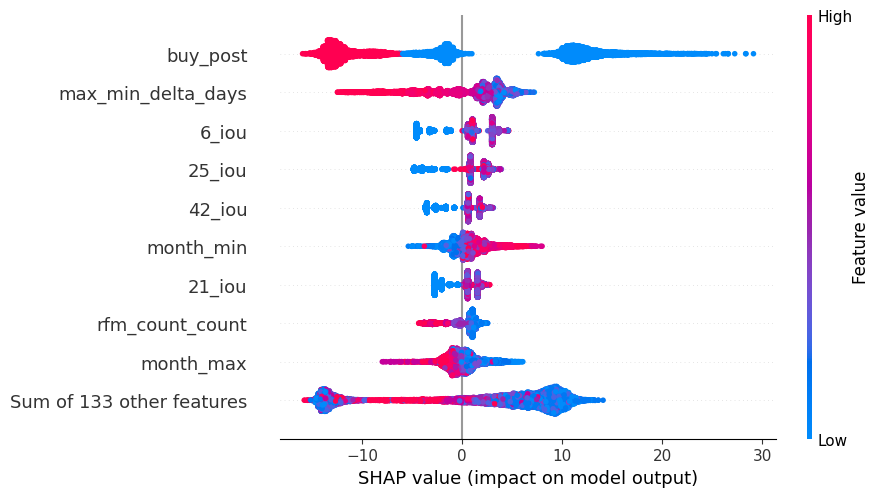

In [12]:
shap.plots.beeswarm(shap_values)

### Prepare submit

In [16]:
!gdown 15QbVCsFWVgrKE0jw5-oNOwBP5kxhdeh4
!gdown 1ATpFjeNm-o2CFsAmkv8E8UBV1lF1AFY5

Downloading...
From: https://drive.google.com/uc?id=15QbVCsFWVgrKE0jw5-oNOwBP5kxhdeh4
To: /content/preds.csv
100% 12.6M/12.6M [00:00<00:00, 61.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ATpFjeNm-o2CFsAmkv8E8UBV1lF1AFY5
To: /content/test_user_order_aggs_v13.csv
100% 94.0M/94.0M [00:01<00:00, 86.6MB/s]


In [179]:
df_preds = pd.read_csv('/content/preds.csv')

In [183]:
df_preds = pd.read_csv('/content/preds.csv')
df_test = pd.read_csv('/content/test_user_order_aggs_v13.csv', compression='zip')
subm = pd.read_csv('/content/user_order_aggs_v13_CatBoost_Colab_002_submit_with_proba_thehold_NEW3.csv', sep=';')

df_end = df_test.set_index('customer_id').join(subm.set_index('customer_id')).reset_index()

df_end['customer_id_binarize'] = pd.qcut(df_end['customer_id'], q=24, labels=False)

# df_end['buy_post'] = (df_end['preds'] > df_end['preds'].median()).astype(int)
# df_end = df_end.drop(['preds'], axis=1)
df_end = df_end[df_train.columns.to_list()]

X_submit = prepare_submit(trained_model, df_end)
X_submit['buy_post'] = df_end['buy_post']

X_submit = X_submit.set_index('customer_id').join(subm.set_index('customer_id'), lsuffix='customer_id', how='right')
X_submit = X_submit.reset_index()[['customer_id', 'date_diff_post', 'buy_postcustomer_id']].rename(columns = {'buy_postcustomer_id': 'buy_post'})
X_submit.query('buy_post==0').loc[:, 'date_diff_post'] = 0
X_submit['date_diff_post'] = X_submit['date_diff_post'] * (X_submit['buy_post'] != False).astype(int)
X_submit = X_submit.fillna(0)
X_submit['buy_post'] = X_submit['buy_post'].astype(int)

X_submit.to_csv(f'{dataset_name}_{model_name}_submit_RMSE.csv', index=False, sep=';')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


In [188]:
all(X_submit.sort_values(by='customer_id')['buy_post'] == subm['buy_post'])

True

In [189]:
!head /content/user_order_aggs_v13_CatBoost_Regresor_Colab_Final_submit_RMSE.csv

customer_id;date_diff_post;buy_post
52341;22.006706056886273;1
69175;16.233858905537197;1
73427;1.5961602399220567;1
134577;0.0;0
156357;24.164529022222858;1
161390;30.687888975449795;1
168512;6.4186559884584895;1
179897;26.77500177083785;1
180373;0.0;0
